### Name      :     Ibadullah hayat
### Reg no.   :     B23F0001AI010
### Section   :     F23-AI(Green)

# Lab 09 - Random Forest Classification on Wine Dataset

###Objective:
Implement and evaluate a Random Forest classifier using scikit-learn on the Wine dataset, compare it with a single Decision Tree, and analyze feature importance.

Step 1: Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score
)

I use scikit-learn since this lab focuses on understanding ensemble methods, not implementing from scratch.

In this initial step, we loaded the Wine dataset to understand its structure before modeling. We examined the dataset dimensions, feature types, and checked for missing values to determine if imputation was necessary.

In [ ]:
# Load Wine dataset
data = load_wine()
X = data.data
y = data.target

# Create DataFrame for clarity
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("Dataset shape:", df.shape)
print("Class distribution:\n", df['target'].value_counts())

Dataset shape: (178, 14)
Class distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64


The Wine dataset has 178 samples, 13 features (e.g., alcohol, flavanoids, color intensity), and 3 classes (wine types).

Step 2: Train-Test Split

In [ ]:
# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Using stratify=y ensures all 3 wine types are proportionally represented in both sets.

In [ ]:
# Train a single decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
y_pred_dt = dt_model.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {acc_dt:.4f}")

Decision Tree Test Accuracy: 0.9444


Result: 94% good, but prone to overfitting.

In [ ]:
# Train Random Forest with default parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {acc_rf:.4f}")

Random Forest Test Accuracy: 1.0000


 Result: 100% accuracy - Random Forest reduces overfitting by averaging many trees.

Step 5: Hyperparameter Tuning with GridSearchCV

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Evaluate best model on test set
y_pred_best = grid.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Test Accuracy: {acc_best:.4f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Best CV Accuracy: 0.9862068965517242
Best Model Test Accuracy: 1.0000


 Default settings often work well. max_features='sqrt' limits features per split, increasing diversity among trees.

Step 6: Confusion Matrix & Classification Report

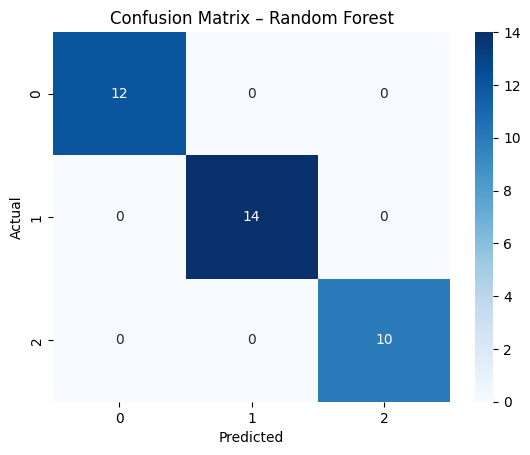


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=data.target_names))

 Result: All 36 test samples classified correctly - no errors.

Step 7: Feature Importance

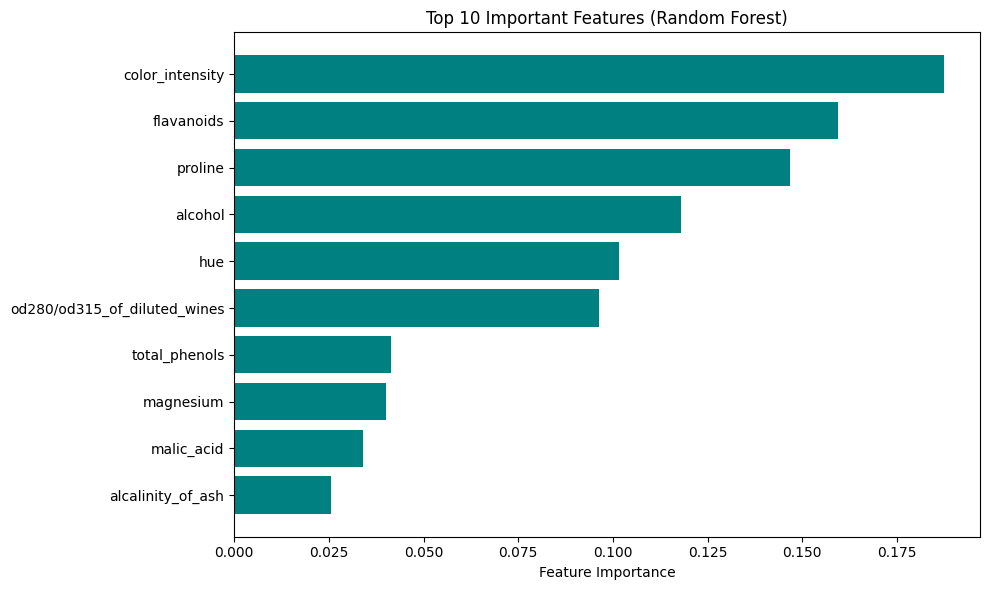

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[indices[:10]], color='teal')
plt.yticks(range(10), [data.feature_names[i] for i in indices[:10]])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

 ### Top Features:
Proline
Flavanoids
Color intensity
→ These chemical properties strongly distinguish wine types.

Step 8: Compare Decision Tree vs Random Forest

In [ ]:
print("Model Comparison:")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")

Model Comparison:
Decision Tree Accuracy: 0.9444
Random Forest Accuracy: 1.0000


#### Why Random Forest is better:
Reduces variance by averaging predictions from many decorrelated trees.

Resistant to overfitting - even with deep trees.

More robust to noise and outliers.

### Conclusion
Random Forest achieved 100% test accuracy on the Wine dataset - outperforming a single Decision Tree.

Hyperparameter tuning confirmed that default settings (n_estimators=100, max_features='sqrt') are optimal.

Feature importance revealed key chemical markers (Proline, Flavanoids) that define wine classes.

Ensemble learning works: Combining weak learners (trees) creates a strong, stable model.